In [1]:
import xarray as xr           #----xarray is used to open and read and manage .nc files
import numpy as np            #--------we can perform various calculations using 'numpy' 
import cartopy.crs as ccrs    
import cartopy.feature as cf
import matplotlib.pyplot as plt
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from netCDF4 import Dataset
from scipy import stats
import matplotlib.patches as mpatches
import pandas as pd
from matplotlib import pyplot as plt
#import statsmodels.api as sm
from scipy import signal
import regionmask
import geopandas as gpd

In [2]:
ds1 = xr.open_dataset('rf_JJAS_1951_2022.nc')
# --- Define 'lons','lats' variables
lon = ds1['LONGITUDE'][:]  
lat = ds1['LATITUDE'][:] 
# --- select JJAS months
fname='Homogeneous Region Shape File1 (1)/Homogeneous Region Shape File1.shp'

In [3]:
r=ds1['RAINFALL'][168:264,:,:]
r

<xarray.DataArray 'RAINFALL' (TIME: 96, LATITUDE: 129, LONGITUDE: 135)>
[1671840 values with dtype=float64]
Coordinates:
  * TIME       (TIME) datetime64[ns] 1993-06-15T12:00:00 ... 2016-09-15T12:00:00
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
Attributes:
    long_name:  Rainfall
    units:      mm
    history:    From ind1901_rfp25.grd

In [4]:
jun=r.sel(TIME=np.in1d(r['TIME.month'], [6]))
JUN=jun.to_numpy()
print(JUN.shape)

jul=r.sel(TIME=np.in1d(r['TIME.month'], [7]))
JUL=jul.to_numpy()
print(JUL.shape)

aug=r.sel(TIME=np.in1d(r['TIME.month'], [8]))
aug
AUG=aug.to_numpy()
print(AUG.shape)

sep=r.sel(TIME=np.in1d(r['TIME.month'], [9]))
sep
SEP=sep.to_numpy()
SEP
print(SEP.shape)

(24, 129, 135)
(24, 129, 135)
(24, 129, 135)
(24, 129, 135)


In [5]:
#JJAS season
JJAS2=JUN+JUL+AUG+SEP
print(JJAS2.shape)

(24, 129, 135)


In [6]:
# --- read netcdf file
ds2= xr.open_dataset('sst_JJAS_1951_2022.nc')
ds2

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 288)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1951-06-01 1951-07-01 ... 2022-09-01
Data variables:
    sst      (time, lat, lon) float32 ...

In [7]:
sst=ds2['sst'][168:264,:,:]
sst

<xarray.DataArray 'sst' (time: 96, lat: 89, lon: 180)>
[1537920 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1993-06-01 1993-07-01 ... 2016-09-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [8]:
# --- make niño 3.4 index
nino = sst.sel(lat=slice(5, -5), lon=slice(360 - 170, 360 - 120))
nino = nino.mean(dim=('lat', 'lon'))
nino

<xarray.DataArray 'sst' (time: 96)>
array([28.080368, 27.514935, 26.98539 , 27.06908 , 28.038507, 27.535686,
       27.379189, 27.191124, 27.588158, 27.08172 , 26.230112, 25.881386,
       27.291513, 26.85322 , 26.636736, 26.27084 , 28.814318, 28.846457,
       28.741447, 28.84198 , 27.350035, 26.316805, 25.58815 , 25.468704,
       26.54195 , 26.128538, 25.63897 , 25.630713, 26.948381, 26.626987,
       26.36775 , 26.203613, 27.538538, 27.25177 , 26.803204, 26.518003,
       28.441662, 28.029366, 27.720316, 27.80502 , 27.442684, 27.496748,
       27.109053, 26.983786, 27.852377, 27.7682  , 27.60391 , 27.522293,
       27.773989, 27.066216, 26.804556, 26.683884, 27.729465, 27.29815 ,
       27.161993, 27.319506, 27.372908, 26.703989, 26.13432 , 25.60716 ,
       27.044806, 26.99289 , 26.724087, 26.465872, 28.042673, 27.774157,
       27.418198, 27.399921, 27.044554, 26.225107, 25.474237, 25.127626,
       27.354248, 26.871988, 26.216661, 25.924181, 27.74885 , 27.538652,
       27.317387, 27.095087, 27.299522, 26.900404, 26.47388 , 26.537537,
       27.944828, 27.21966 , 26.820045, 26.995756, 28.904549, 28.744583,
       28.776915, 28.915194, 27.708387, 26.826405, 26.291698, 26.15691 ],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1993-06-01 1993-07-01 ... 2016-09-01

In [9]:
sst_jun=nino.sel(time=np.in1d(nino['time.month'], [6]))
sst_JUN=sst_jun.to_numpy()

sst_jul=nino.sel(time=np.in1d(nino['time.month'], [7]))
sst_JUL=sst_jul.to_numpy()

sst_aug=nino.sel(time=np.in1d(nino['time.month'], [8]))
sst_AUG=sst_aug.to_numpy()

sst_sep=nino.sel(time=np.in1d(nino['time.month'], [9]))
sst_SEP=sst_sep.to_numpy()

In [10]:
sst_JJAS=(sst_JUN+sst_JUL+sst_AUG+sst_SEP)/4
sst_JJAS

array([27.412441, 27.536127, 26.695343, 26.763077, 28.81105 , 26.180923,
       25.985043, 26.536684, 27.027878, 27.999092, 27.258068, 27.686695,
       27.08216 , 27.377277, 26.454594, 26.806913, 27.658737, 25.96788 ,
       26.591768, 27.424994, 26.802837, 27.245073, 28.83531 , 26.74585 ],
      dtype=float32)

In [11]:
#Spatial correlation
cr=np.empty((2,129,135))
for i in range(0,129):
    for j in range(0,135):
        cr[:,i,j]=stats.spearmanr(JJAS2[:,i,j],sst_JJAS)
print(cr.shape)

C:\Users\CMPG-PC\anaconda3\envs\Python\lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


(2, 129, 135)


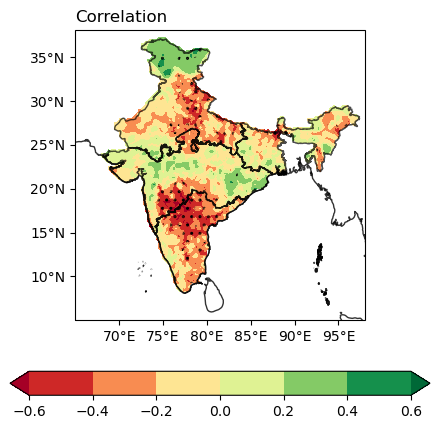

In [12]:
# Panel Plot 
fig, (ax1) = plt.subplots(1,1, figsize=(10, 5),subplot_kw={"projection": ccrs.PlateCarree()})

ax1.set_title('Correlation',fontsize=12, loc='left')
clevs = [-0.6,-0.4,-0.2,0,0.2,0.4,0.6]
cf1 = ax1.contourf(lon,lat,cr[0],clevs,extend='both',transform=ccrs.PlateCarree(),
                   cmap=plt.cm.RdYlGn)
ax1.coastlines(alpha=0.8)
ax1.add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),edgecolor='black', facecolor='none',alpha=0.7)
ax1.set_xticks([70,75,80,85,90,95], crs=ccrs.PlateCarree())
ax1.set_yticks([10,15,20,25,30,35], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True,number_format='.0f')
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.set_extent([65, 98,5 ,37])
ax1.contourf(lon, lat, cr[1],levels=np.arange(0, 0.1, 0.01),
            transform=ccrs.PlateCarree(), hatches=['..'], alpha=0)


# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.3,top=0.88,left=0.2,right=0.9,wspace=-0.25,hspace=0.37)
# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.34, 0.15, 0.42, 0.048])

# Draw the colorbar
cbar=fig.colorbar(cf1, cax=cbar_ax,orientation='horizontal')
#plt.text(280, -3, '(%)', fontsize = 11,rotation=90)#mm month$^-$$^1$)
#plt.text(-1690, -140, '(Clim:1991-2020)', fontsize = 11)
#plt.savefig("ISMR_Nino34_Corr_Obs_1993_2016.jpg", dpi=600)
plt.show()